In [2]:
!pip install numpy
!pip install matplotlib
!pip install opencv-python

NameError: name 'x' is not defined

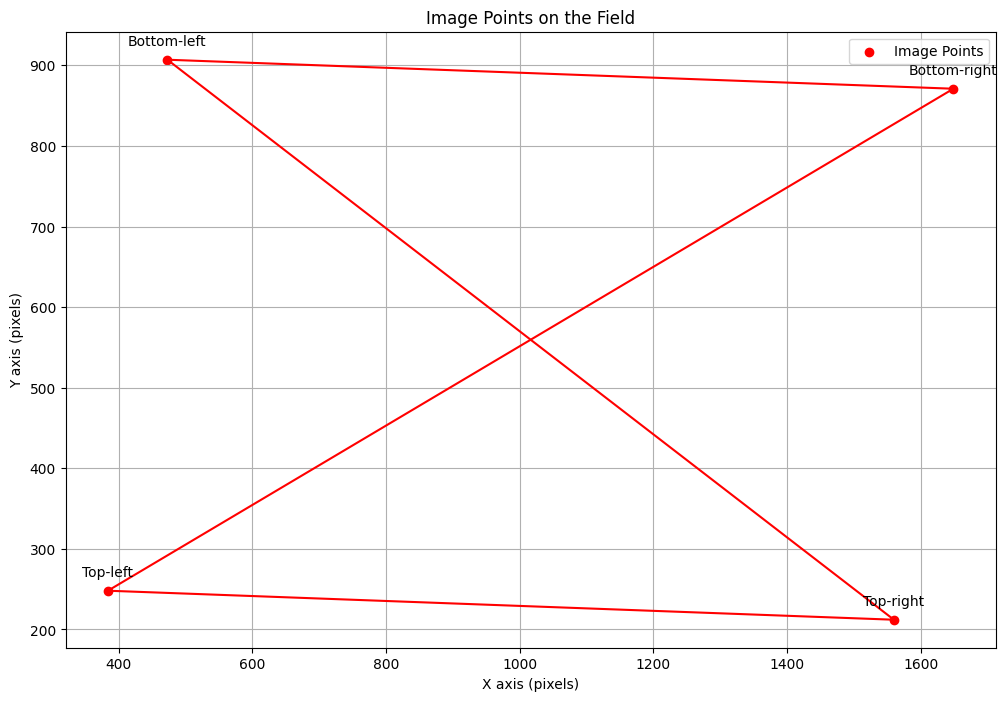

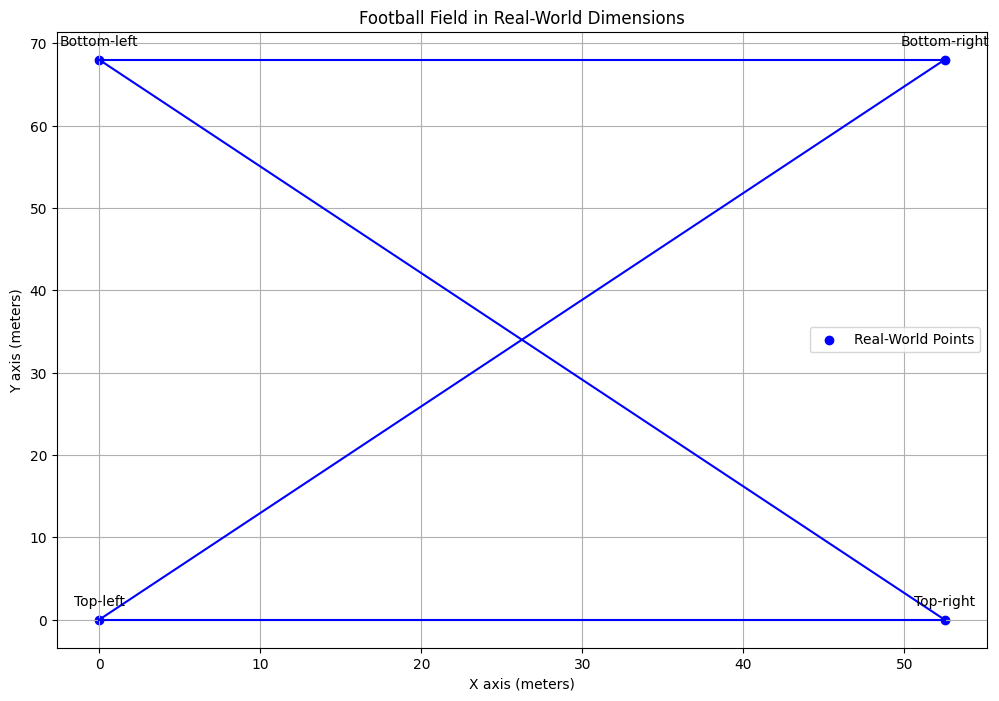

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Given points from the image
image_points = np.array([
    [384, 248],   # Top-left
    [1560, 212],  # Top-right
    [473, 907]    # Bottom-left
], dtype='float32')

# Corresponding real-world points
real_world_points = np.array([
    [0, 0],       # Top-left
    [52.5, 0],    # Top-right
    [0, 68],      # Bottom-left
    [52.5, 68]    # Bottom-right
], dtype='float32')

# Function to estimate the fourth point using properties of a rectangle
def estimate_fourth_point(image_pts):
    # Estimate the fourth point using the vector properties of a rectangle
    vec_top = image_pts[1] - image_pts[0]
    vec_left = image_pts[2] - image_pts[0]
    
    estimated_bottom_right = image_pts[2] + vec_top
    return estimated_bottom_right

# Estimate the fourth point
bottom_right_image_point = estimate_fourth_point(image_points)

# Add the calculated bottom-right point to the image points array
complete_image_points = np.vstack([image_points, bottom_right_image_point])

# Let's plot the image points and the transformed points
plt.figure(figsize=(12, 8))

# Plot image points
plt.scatter(complete_image_points[:, 0], complete_image_points[:, 1], color='red', label='Image Points')
for i, txt in enumerate(['Top-left', 'Top-right', 'Bottom-left', 'Bottom-right']):
    plt.annotate(txt, (complete_image_points[i, 0], complete_image_points[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Connect the points to form the field
for i in range(4):
    plt.plot([complete_image_points[i, 0], complete_image_points[(i+1)%4, 0]], [complete_image_points[i, 1], complete_image_points[(i+1)%4, 1]], 'r-')

# Set plot parameters
plt.title('Image Points on the Field')
plt.xlabel('X axis (pixels)')
plt.ylabel('Y axis (pixels)')
plt.legend()
plt.grid(True)
plt.show()

# Now, let's visualize the field in real-world dimensions
plt.figure(figsize=(12, 8))

# Plot real-world points
plt.scatter(real_world_points[:, 0], real_world_points[:, 1], color='blue', label='Real-World Points')
for i, txt in enumerate(['Top-left', 'Top-right', 'Bottom-left', 'Bottom-right']):
    plt.annotate(txt, (real_world_points[i, 0], real_world_points[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Connect the points to form the field
for i in range(4):
    plt.plot([real_world_points[i, 0], real_world_points[(i+1)%4, 0]], [real_world_points[i, 1], real_world_points[(i+1)%4, 1]], 'b-')

# Set plot parameters
plt.title('Football Field in Real-World Dimensions')
plt.xlabel('X axis (meters)')
plt.ylabel('Y axis (meters)')
plt.legend()
plt.grid(True)
plt.show()



[[ 384.  248.]
 [1560.  212.]
 [1649.  871.]
 [ 473.  907.]]


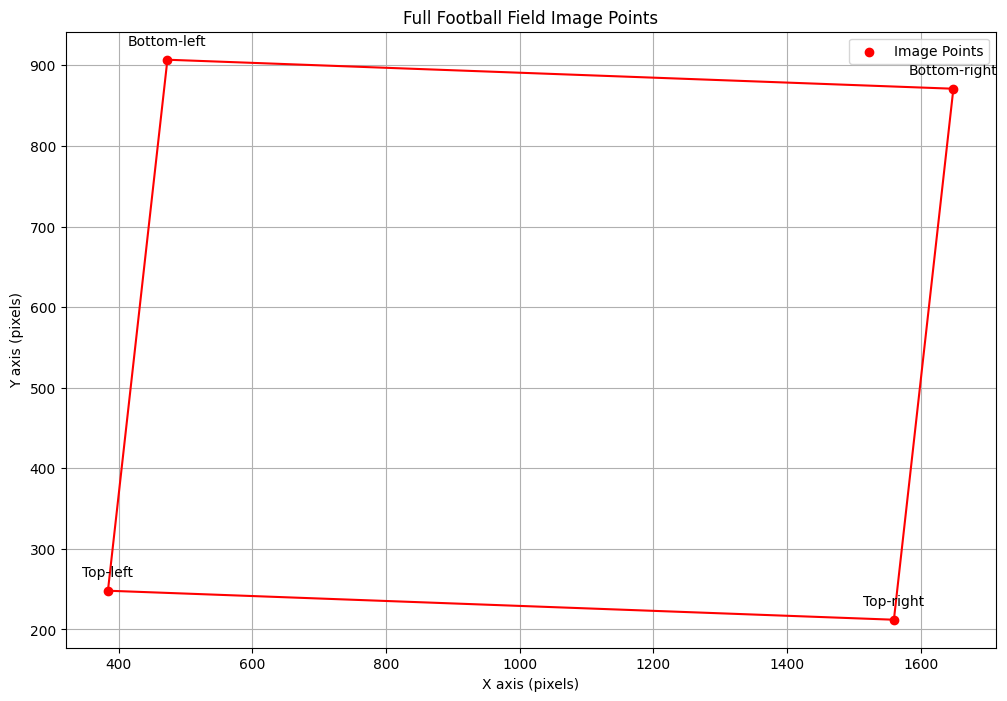

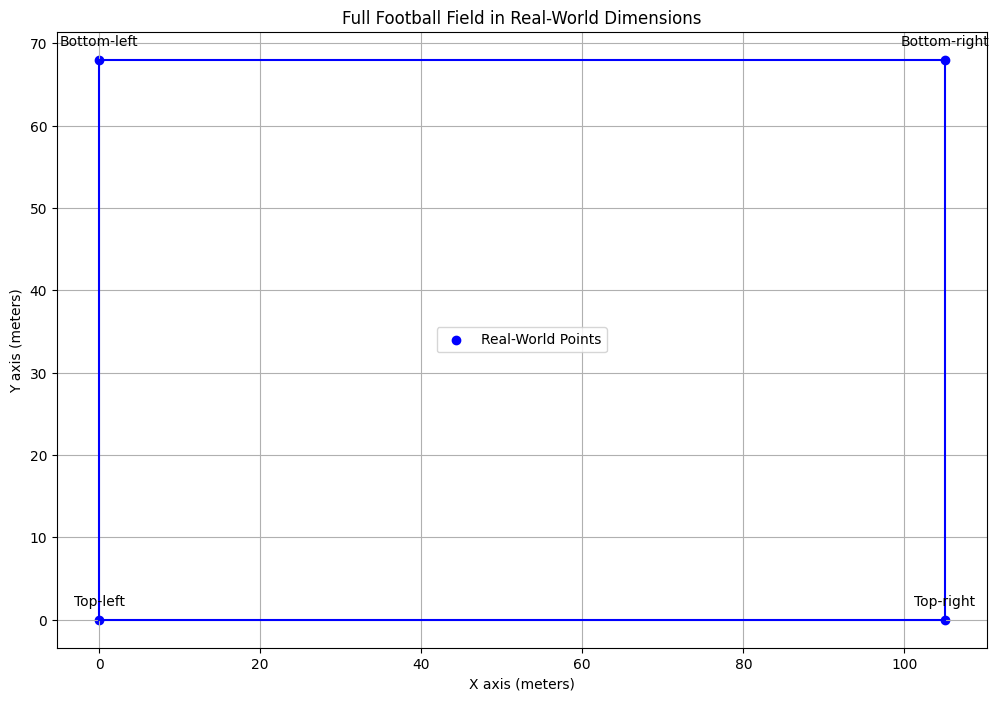

In [19]:
full_field_real_world_points = np.array([
    [0, 0],        # Top-left
    [105, 0],      # Top-right
    [105, 68],     # Bottom-right
    [0, 68]        # Bottom-left
], dtype='float32')

# Define the corresponding image points for the full field
# We already have the half field points, we will calculate the remaining points
half_field_image_points = np.array([
    [384, 248],    # Top-left
    [1560, 212],   # Top-right
    [473, 907],    # Bottom-left
    bottom_right_image_point # Bottom-right (estimated)
], dtype='float32')

# Estimate the remaining points for the full field by reflecting the existing points
full_field_image_points = np.array([
    half_field_image_points[0],  # Top-left
    half_field_image_points[1],  # Top-right
    half_field_image_points[3],  # Bottom-right
    half_field_image_points[2]   # Bottom-left
], dtype='float32')

# Plot the full field
plt.figure(figsize=(12, 8))

# Plot image points for the full field
plt.scatter(full_field_image_points[:, 0], full_field_image_points[:, 1], color='red', label='Image Points')
for i, txt in enumerate(['Top-left', 'Top-right', 'Bottom-right', 'Bottom-left']):
    plt.annotate(txt, (full_field_image_points[i, 0], full_field_image_points[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
print(full_field_image_points)
# Connect the points to form the field
for i in range(4):
    plt.plot([full_field_image_points[i, 0], full_field_image_points[(i+1)%4, 0]], [full_field_image_points[i, 1], full_field_image_points[(i+1)%4, 1]], 'r-')

# Set plot parameters
plt.title('Full Football Field Image Points')
plt.xlabel('X axis (pixels)')
plt.ylabel('Y axis (pixels)')
plt.legend()
plt.grid(True)
plt.show()

# Now, visualize the full field in real-world dimensions
plt.figure(figsize=(12, 8))

# Plot real-world points for the full field
plt.scatter(full_field_real_world_points[:, 0], full_field_real_world_points[:, 1], color='blue', label='Real-World Points')
for i, txt in enumerate(['Top-left', 'Top-right', 'Bottom-right', 'Bottom-left']):
    plt.annotate(txt, (full_field_real_world_points[i, 0], full_field_real_world_points[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Connect the points to form the field
for i in range(4):
    plt.plot([full_field_real_world_points[i, 0], full_field_real_world_points[(i+1)%4, 0]], [full_field_real_world_points[i, 1], full_field_real_world_points[(i+1)%4, 1]], 'b-')

# Set plot parameters
plt.title('Full Football Field in Real-World Dimensions')
plt.xlabel('X axis (meters)')
plt.ylabel('Y axis (meters)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import cv2

# Define the coordinates for the full football field using the real-world dimensions
full_field_real_world_points = np.array([
    [0, 0],        # Top-left
    [105, 0],      # Top-right
    [105, 68],     # Bottom-right
    [0, 68]        # Bottom-left
], dtype='float32')

# Corresponding image points
full_field_image_points = np.array([
    [384, 248],    # Top-left
    [1560, 212],   # Top-right
    bottom_right_image_point,  # Bottom-right (estimated previously)
    [473, 907]     # Bottom-left
], dtype='float32')

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(full_field_image_points, full_field_real_world_points)

# Camera intrinsic parameters (assuming standard values for simplicity)
# These values would normally come from the camera calibration process
# fx, fy = focal lengths, cx, cy = principal points (center of the image)
fx = fy = 1  # Assuming focal length is normalized
cx = cy = 0  # Assuming principal point at the center

camera_matrix = np.array([[fx, 0, cx],
                          [0, fy, cy],
                          [0,  0,  1]], dtype='float32')

# Decompose the homography matrix to get rotation and translation
_, rotations, translations, _ = cv2.decomposeHomographyMat(homography_matrix, camera_matrix)

# We assume the first solution is the correct one
rotation_matrix = rotations[0]

# Compute the Euler angles from the rotation matrix
sy = np.sqrt(rotation_matrix[0, 0] ** 2 + rotation_matrix[1, 0] ** 2)
singular = sy < 1e-6

if not singular:
    x_angle = np.arctan2(rotation_matrix[2, 1], rotation_matrix[2, 2])
    y_angle = np.arctan2(-rotation_matrix[2, 0], sy)
    z_angle = np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])
else:
    x_angle = np.arctan2(-rotation_matrix[1, 2], rotation_matrix[1, 1])
    y_angle = np.arctan2(-rotation_matrix[2, 0], sy)
    z_angle = 0

# Convert the angles from radians to degrees
x_angle_deg = np.degrees(x_angle)
y_angle_deg = np.degrees(y_angle)
z_angle_deg = np.degrees(z_angle)

x_angle_deg, y_angle_deg, z_angle_deg

(0.027879777133983617, 0.19965709675418314, 7.722976912376836)

In [18]:
# Camera intrinsic parameters (assuming standard values for simplicity)
# These values would normally come from the camera calibration process
# fx, fy = focal lengths, cx, cy = principal points (center of the image)
# Assuming a focal length of 1 and principal point at the center for simplicity
fx = fy = 1  # Assuming normalized focal length
cx = cy = 0  # Assuming principal point at the center

camera_matrix = np.array([[fx, 0, cx],
                          [0, fy, cy],
                          [0,  0,  1]], dtype='float32')

# Decompose the homography matrix to get rotation and translation vectors
_, rotations, translations, normals = cv2.decomposeHomographyMat(homography_matrix, camera_matrix)

# We assume the first solution is the correct one
rotation_matrix = rotations[0]
translation_vector = translations[0]

# The translation vector gives us the position of the camera
# The height of the camera is given by the third component of the translation vector
camera_height = translation_vector[2]

camera_height


array([8.78376608])